# Final Project - Predicting Movie Genres!

![Movie genre header](genre_header.jpg)

Welcome to the final project of CS109b. 

The overall theme of the final project is movie data with a focus on movie genre prediction, because it is an area where we are all more or less application domain experts. First, you will explore your data and the challenges of the problem by exploratory data analysis. Use visualizations to find features that correlate with movie genres. These can be extracted from the movie posters, or meta data, or other data you gather, for example plot summaries or even movie transcripts. You will then compare traditional statistical or machine learning methods like generalized additive models, random forest, Bayesian prediction methods, boosting, and SVM, to deep learning models for movie genre prediction. 

For this project you will work in teams of 3-4 people and there are weekly milestones to guide you along the way. Even though the milestones are graded, they are mainly in place to make sure you stay in contact with your TF and make progress with the project. Throughout the project you also have room for creativity and to pursue your own ideas. While you need to hand in the milestones at the appropriate due date, there is nothing preventing you from working on a later milestone ahead of time. We suggest that you read through the whole project and all milestones in the beginning to be able to plan ahead. The project is pretty open-ended, so you can be creative and let your data science knowledge shine! 

For each milestone you will submit a notebook, in raw (`.ipynb`) and PDF formats, containing the deliverables of that week and the extra work you did so far. The notebooks need to contain your code, comments, explanations, thoughts, and visualizations. The final deliverables are a two-minute screencast, a report in paper style for a general data science audience, and all your data and code that you developed throughout the project. 

Below is a description of the data and the milestones with their due dates. All work is due by 11:59PM on the due date unless otherwise specified. We expect you to have the mandatory parts finished by the milestone due dates, and there will be no extensions. However, we strongly encourage you to plan ahead. For example, you need to think about the classification task early on to plan how you want to assemble your training data, and it is beneficial to start the deep learning work as early as possible. There is nothing hindering you to already train a model in the EDA phase to get a better feel for what challenges might lie ahead with the data. You should also see the milestone requirements as a basis for your own creativity, and we expect that most of you will go beyond the mandatory deliverables. For example, if you have a great idea about an interesting question that has to do with movie genre, but cannot be answered with the data from TMDb or IMDb, feel free to gather more data from somewhere else. 

We provide a data interface in Python, because it is convenient for IMDb, and we will use Python for the deep learning part. Specifically we will use Keras, a deep learning library that provides a high level interface to Google's Tensorflow framework for deep learning. However, if you feel that you prefer to do some of the work, e.g., visualizations or data cleanup, in R then feel free to use it. You can also use Spark to preprocess your data, especially if you collect large amounts of it from other sources. 

*Important:* Your grade for a milestone will depend on the required deliverables you submit at the due date for that milestone. But every milestone, especially the final project submission, can contain additional cool work you did that goes beyond the deliverables spelled out below. 


### Logistics 

Please adhere to the following guidelines for all submissions:
- one submission per team
- notebooks should be submitted as PDF and as raw (`.ipynb`) version
- all notebooks should be executed so they contain relevant visualizations, and other results
- try to make it as easy as possible for the TFs to get all relevant information about your work
- do not submit big data sets, please provide a readme file with a link instead
- the final report should also be submitted as pdf

### Movie Data:

The project is based on two different sources of movie data: [IMDb](http://www.imdb.com/) and [TMDb](https://www.themoviedb.org/). TMDb is great, because it provides the movie posters in addition to the metadata. This is crucial for the deep learning part, in which you will try to predict movie genres from posters. IMDb has more metadata available and will supplement the TMDb data you have. 

TMDb provides an easy to use [API](https://www.themoviedb.org/documentation/api) that allows you to download the data selectively. IMDb does not provide an API, but there is a Python interface available to access the metadata. We will use [IMDbPY](http://imdbpy.sourceforge.net/), which is already installed on the AMI and virtual box images for your convenience.

*Important*: Please remember to limit your data rate when obtaining the data. Play nicely and do not just spam servers as fast as you can. This will prevent your IP from getting banned. The easiest way to do this is to use the [sleep](http://stackoverflow.com/questions/510348/how-can-i-make-a-time-delay-in-python) function in Python.


### Milestone 1: Getting to know your data, due Wednesday, April 5, 2017

In the beginning you should get acquainted with the data sources and do some EDA. Sign up for the TMDb [API](https://www.themoviedb.org/documentation/api), and try to download the poster of your favorite movie from within your notebook. Compare the genre entries of IMDb and TMDb for this movie and see if they are the same. Think about and write down some questions that you would like to answer in the following weeks. Keep the storytelling aspect of your final report in mind and do some pen and paper sketches about the visualizations you would like to produce. Include photographs of those sketches in your notebook. 

Most of the time a data scientist spends on a project is spent on cleaning the data. We are lucky that the data we have is already pretty clean. The Python interface to the IMDb ftp files does a lot of the additional work of cleaning as well. However, you will notice that the genre list for each movie from both databases can have different lengths. This needs to be changed in order to train a model to predict the movie genre. It is up to you to think about possible ways to address this problem and to implement one of them. There is no absolute right answer here. It depends on your interests and which questions you have in mind for the project. 

Optionally, you could also scrape additional data sources, such as Wikipedia, to obtain plot summaries. That data may give you additional useful features for genre classification. 

To guide your decision process, provide at least one visualization of how often genres are mentioned together in pairs. Your visualization should clearly show if a horror romance is more likely to occur in the data than a drama romance.

The notebook to submit for this milestone needs to at least include:

- API code to access the genre and movie poster path of your favorite movie
- Genre for this movie listed by TMDb and IMDb
- A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
- Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them 
- Code to generate the movie genre pairs and a suitable visualization of the result
- Additional visualization sketches and EDA with a focus on movie genres
- A list of questions you could answer with this and related data. Get creative here!

The EDA questions do not necessarily have to tie into the modeling part later on. Think freely about things that might be interesting, like which actors are very specific to a genre? Are action movies more prone to producing sequels than romances? However, as you keep the focus on movie genres, think also about correlations you might discover that can help build features from the metadata for prediction. Is the length of a movie title correlated with genre?


In [1]:
import time
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Installed by running this line in terminal: pip install IMDbPY
## Tutorial found here http://imdbpy.sourceforge.net/support.html
import imdb

### Downloaded this via this line: pip install tmdbsimple
## Tutorial found here https://pypi.python.org/pypi/tmdbsimple
import tmdbsimple as tmdb 

In [2]:
## Pass in our tmdb Key 
tmdb.API_KEY = '352e668a0df90032e0f1097459228131'

# Create the object that will be used to access the IMDb's database.
ia = imdb.IMDb()

# #1: API code to access the genre and movie poster path of your favorite movie

* Favorite movie: 300
* Database: TMDB

In [3]:
# first need to get the tmdb id for 300
search = tmdb.Search()
response = search.movie(query="300")

for res in search.results:
    print res['title'], res['id'], res['release_date'], res['popularity']

## in this case I just took the top result
fav_movie_tmdb = search.results[0]

300 1271 2006-12-09 4.632851
300: Rise of an Empire 53182 2014-03-05 4.813915
The 300 Spartans 19972 1962-08-01 2.127148
Decameron '300 436902 1972-08-11 1.003737
300 Souls 332423 2015-03-25 1.007059
United 300 204183 2007-04-30 1.000641
300 Miles 409110 2016-08-11 1.009654
300 Killers 54799 2011-01-18 1.002066
300 Pounds 68690 2007-01-01 1.000429
300 Worte Deutsch 309038 2015-02-05 1.081951
Last Stand of the 300 37122 2007-05-27 1.015794
4 Damas en 300 293965 2011-07-17 1.002216
300 Miles to Freedom 329318 2011-01-01 1.000901
300 Miles to Heaven 155325 1989-10-30 1.000008
Kamis Ke 300 406842  1.000002
Million Dollar Eel 285994 1971-05-06 1.006525
Planet Deutschland - 300 Millionen Jahre 295831 2014-10-02 1.00244
Fangio: Una vita a 300 all'ora 435791 1980-01-01 1.002051
75 habitantes, 20 casas, 300 vacas 202434 2011-05-11 1.001304
Roberto Carlos a 300 Quilômetros Por Hora 273427 1971-06-01 1


In [4]:
fav_movie_id = search.results[0]["id"]
print "Movie ID for '300': ", fav_movie_id 

Movie ID for '300':  1271


In [5]:
# get the movie
movie = tmdb.Movies(1271)
info = movie.info()
print "TMDB Genres for 300: ", [genre["name"] for genre in info["genres"]]
print "TMDB Poster path for 300: ", info["poster_path"]

TMDB Genres for 300:  [u'Action', u'Adventure', u'War']
TMDB Poster path for 300:  /bYR8O1H1ZlME7Dm9ysfTYZnRDpw.jpg


In [6]:
# Search for a movie (get a list of Movie objects).
s_result = ia.search_movie('300')
for item in s_result:
    print item['long imdb canonical title'], item.movieID

300 (2006) 0416449
"300" (2014) 4066210
"300 (1973) (TV Episode)  - Season 3 | Episode 40  - The Electric Company" (1971) 0904372
Idiocracy (2006) 0387808
300: Rise of an Empire (2014) 1253863
Mystery Science Theater 3000: The Movie (1996) 0117128
3000 Miles to Graceland (2001) 0233142
300 the Resurgence (in development) (????) 4576032
300 Spartans, The (1962) 0055719
"Mystery Science Theater 3000: The Return" (2017) 6782014
"Mystery Science Theater 3000" (1988) 0094517
Last Stand of the 300 (2007) (TV) 0892737
Mr 3000 (2004) 0339412
Decameron '300 (1972) 0068460
"300 (2005) (TV Episode)  - Season 21 | Episode 27  - The Bill" (1984) 0524939
"300 (2007) (TV Episode)  - Season 1 | Episode 5  - History in Focus" (2006) 1142331
"300 (2009) (TV Episode)  - Season 1 | Episode 73  - Merci Qui?" (2008) 5274864
"300 (2014) (TV Episode)  - Season 3 | Episode 5  - Honest Trailers" (2012) 3614658
"300 (2012) (TV Episode)  - Season 3 | Episode 9  - Bath Bayakha" (2011) (mini) 5152204
"300 (2007) (T

In [7]:
fav_movie_imdb = s_result[0]
ia.update(fav_movie_imdb)
print "IMDB Genres for 300: ", fav_movie_imdb['genre']

IMDB Genres for 300:  [u'Action', u'Fantasy']


# #2: Genre for this movie listed by TMDb and IMDb

In summary:
    * TMDB says the genres are Action, Adventure, and War
    * IMDB says the genres are Action, and Fantasy
    
  This difference could lead to problems in the future when we are trying to compare similar movies but that come have different supposed "genres." One way that we might avoid this is by doing a merge between the genres or selecting genres that appear in both (in this case that would be 'action')

# #3: A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API

In [8]:
# abdapted from http://programtalk.com/python-examples/tmdbsimple.Discover/
discover = tmdb.Discover()
movies_2016 = discover.movie(year=2016)

In [9]:
for movie in discover.results[0:10]:
    _id = movie["id"]
    movie = tmdb.Movies(_id)
    response = movie.info()
    print "Movie title: {0}".format(response["title"])
    print "Movie popularity: {0}".format(response["popularity"])
    print "Movie genre: {0}".format([info["name"] for info in movie.genres])
    print "\n"

Movie title: Sing
Movie popularity: 50.36586
Movie genre: [u'Animation', u'Comedy', u'Drama', u'Family', u'Music']


Movie title: Split
Movie popularity: 34.024078
Movie genre: [u'Horror', u'Thriller']


Movie title: Captain America: Civil War
Movie popularity: 30.396851
Movie genre: [u'Adventure', u'Action', u'Science Fiction']


Movie title: Fantastic Beasts and Where to Find Them
Movie popularity: 29.059918
Movie genre: [u'Action', u'Adventure', u'Fantasy']


Movie title: Arrival
Movie popularity: 25.994312
Movie genre: [u'Thriller', u'Drama', u'Science Fiction', u'Mystery']


Movie title: Rogue One: A Star Wars Story
Movie popularity: 25.672196
Movie genre: [u'Action', u'Drama', u'Science Fiction']


Movie title: John Wick
Movie popularity: 25.304792
Movie genre: [u'Action', u'Thriller']


Movie title: Deadpool
Movie popularity: 23.832866
Movie genre: [u'Action', u'Adventure', u'Comedy', u'Romance']


Movie title: La La Land
Movie popularity: 23.013996
Movie genre: [u'Comedy', u'Dr

# #4: Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them

1) There are differences in the genres listed by TMDb vs. IMDb
    - We could use a union of the genres so that only those genres in both databases are considered correct
    This also leads to a bigger question of "What does it mean to correctly select a movie genre?" Does thie mean that we select the best genre from IMDb, TMDb? Does this mean we might select multiple genres? These are all questions that we will need to face. 
2) The data will take a long time to load from the APIs because we need to restrict the rate at which we pull large amounts of data - ethics
    - We need to work ahead and use AWS. In particular, if we are using a large dataset, we might need to pull a significant amount of our data in advance. 
3) We need to figure out what the "Correct" Genre means 
    - As we can see from the print out above, many movies have more than one genre. In this case we have that doctor strangelove is considered action, adventure, fantasy, AND science fiction. However, we probably want to create a model that only predicts one of these genres and not all of them. One way that we can break this down and make this easier is by creating a subset of genres that we believe exist in the world. (e.g. taking the top 50 genres.) Then for each of our movies, we make a prediction that only exists within that realm of genres. Another option is for us to try and predict all genres that might be attached to a movie, though this data might be too sparse to be predictive. 

# #5: Code to generate the movie genre pairs and a suitable visualization of the result
This section gives a brief look at the relationship between genres. We will then extend upon it to choose only one genre per a movie. 

In [10]:
genres_obj = tmdb.Genres()
genre_ids = {genre["name"]: genre["id"] for genre in genres_obj.list()["genres"]}

print "Number of genres: {0}".format(len(genre_ids.keys()))
genre_ids

Number of genres: 19


{u'Action': 28,
 u'Adventure': 12,
 u'Animation': 16,
 u'Comedy': 35,
 u'Crime': 80,
 u'Documentary': 99,
 u'Drama': 18,
 u'Family': 10751,
 u'Fantasy': 14,
 u'History': 36,
 u'Horror': 27,
 u'Music': 10402,
 u'Mystery': 9648,
 u'Romance': 10749,
 u'Science Fiction': 878,
 u'TV Movie': 10770,
 u'Thriller': 53,
 u'War': 10752,
 u'Western': 37}

In [14]:
reverse_genre_ids = {v: k for k, v in genre_ids.iteritems()}
reverse_genre_ids

{12: u'Adventure',
 14: u'Fantasy',
 16: u'Animation',
 18: u'Drama',
 27: u'Horror',
 28: u'Action',
 35: u'Comedy',
 36: u'History',
 37: u'Western',
 53: u'Thriller',
 80: u'Crime',
 99: u'Documentary',
 878: u'Science Fiction',
 9648: u'Mystery',
 10402: u'Music',
 10749: u'Romance',
 10751: u'Family',
 10752: u'War',
 10770: u'TV Movie'}

In [11]:
discover = tmdb.Discover()
movie_dict = {genre: [] for genre in genre_ids.iterkeys()}

# count how many results we get for each genre
movie_cnts = {genre: 0 for genre in genre_ids.iterkeys()}

# need ids for each genre
for genre in genre_ids.keys():    
    # scan 10 pages for movies
    for p in range(1, 10):
        # find all movies with a given id on a given page
        discover.movie(with_genres = genre_ids[genre], page = p)
        for page in discover.results:
            # we found another movie
            movie_cnts[genre] += 1
            
            # add the ids from this new movie to the list
            movie_dict[genre].extend(page["genre_ids"])
            
    # sleep so that we don't get kicked off the API
    time.sleep(10)

In [17]:
# make a copy of the movie dict so that we don't have 
# to rerun the above cell if we mess up
genre_percentages_mutable = movie_dict.copy()
genre_percentages_immutable = genre_percentages_mutable.copy()

for genre in genre_percentages_mutable:
    # make a dictionary of frequencies instead of raw ids
    genre_percentages_mutable[genre] = Counter(genre_percentages_mutable[genre])
    genre_percentages_immutable[genre] = Counter(genre_percentages_immutable[genre])
    
# for each genre in the dictionary
for genre in genre_percentages_mutable:
    # normalize each raw number into a percentages
    for genre_id in genre_percentages_mutable[genre]:
        
        if genre_id == 10769:
            continue
        
        # this should represent the percent of the occurences in which `genre` is mentioned
        # in tandem with `genre_id`
        #
        # i.e. the key is a genre (e.g. drama) and the id is a genre id
        # that drama might be paired with (e.g. romance). So, to get the pairing occurence,
        # we need to take the counter of [genre][genre_id] with [genre_id][genre] and then
        # divide by the total counts (e.g. genre + genre_id)
        total_cnts = movie_cnts[genre] + movie_cnts[reverse_genre_ids[genre_id]]
        total_occ = genre_percentages_immutable[genre][genre_id] + genre_percentages_immutable[reverse_genre_ids[genre_id]][genre_ids[genre]]
                    
        genre_percentages_mutable[genre][genre_id] = total_occ * 1.0 / total_cnts

In [20]:
percent_df = pd.DataFrame([pd.Series(genre_percentages_mutable[genre]) for genre in genre_ids.keys()])
percent_df = percent_df.T
percent_df.rename(columns=dict(zip(range(0, 19), genre_ids.keys())), inplace = True)

# drop this rogue ID
# percent_df.drop([10769], inplace = True)

percent_df.rename(index=dict(zip(percent_df.index, [reverse_genre_ids[genre_id] for genre_id in percent_df.index])), inplace = True)

# replace all nans with 0, indicating a 0 percent mention rate for that pair
percent_df.fillna(0, inplace = True)

# reorder the axes so that they match up on the diagonals
percent_df = percent_df.reindex_axis(sorted(percent_df.columns), axis=1)
percent_df = percent_df.reindex_axis(sorted(percent_df.columns), axis=0)

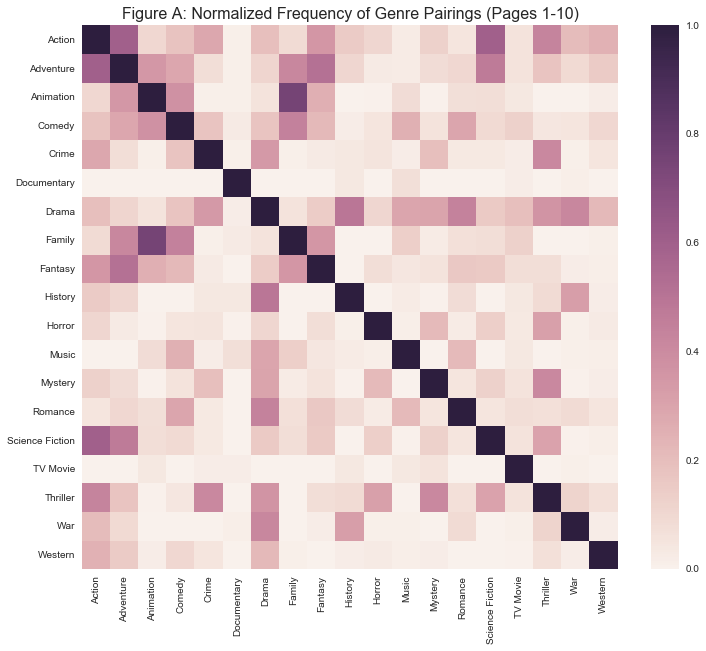

In [23]:
plt.figure(figsize=(12, 10))
plt.title("Figure A: Normalized Frequency of Genre Pairings (Pages 1-10)", fontsize=16)
sns.heatmap(percent_df)

### Insights

* Examining our heatmap for the first twenty page instances per genre, we see that the pairing are intuitive. 
* Here, we see overlap between history and drama films along with adventure and action. In addition, we see high crossover between family and animation along with crime and thriller.
* Beyond seeing the tendancy for some genres to be listed together, we also see that some categories are vaguer than others. Here, for example, we see that Thriller and Drama serve as catch-alls whereas documentary has a relatively specific definition.

# #6: Additional visualization sketches and EDA with a focus on movie genres

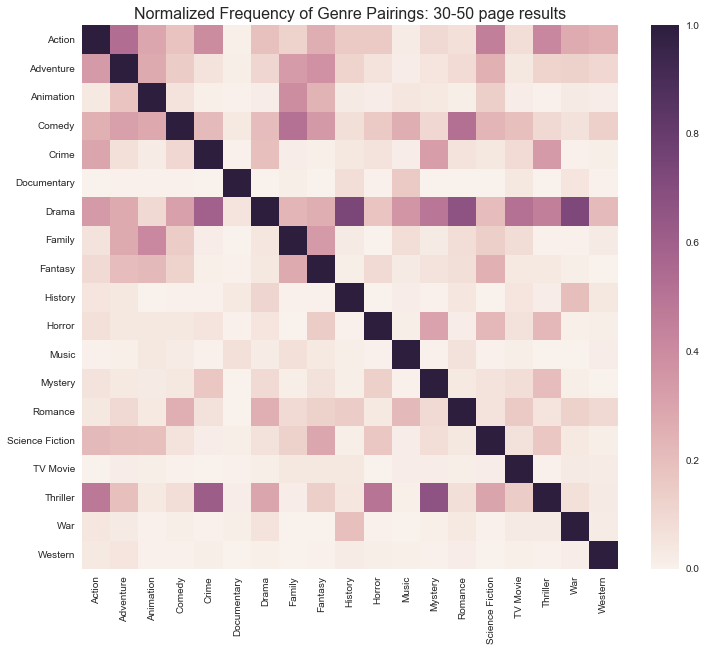

In [24]:
discover_ = tmdb.Discover()
movie_dict = {genre: [] for genre in genre_ids.iterkeys()}

# count how many results we get for each genre
movie_cnts = {genre: 0 for genre in genre_ids.iterkeys()}

# need ids for each genre
for genre in genre_ids.keys():    
    # scan 20 pages for movies
    for p in range(30, 50):
        # find all movies with a given id on a given page
        discover.movie(with_genres = genre_ids[genre], page = p)
        for page in discover.results:
            # we found another movie
            movie_cnts[genre] += 1
            
            # add the ids from this new movie to the list
            movie_dict[genre].extend(page["genre_ids"])
            
    # sleep so that we don't get kicked off the API
    time.sleep(10)
    
# make a copy of the movie dict so that we don't have 
# to rerun the above cell if we mess up
genre_percentages = movie_dict.copy()

# for each genre in the dictionary
for genre in genre_percentages:
    
    # make a dictionary of frequencies instead of raw ids
    genre_percentages[genre] = Counter(genre_percentages[genre])
    
    # normalize each raw number into a percentage 
    for genre_id in genre_percentages[genre]:
        genre_percentages[genre][genre_id] = genre_percentages[genre][genre_id] * 1.0 / movie_cnts[genre]

percent_df = pd.DataFrame([pd.Series(genre_percentages[genre]) for genre in genre_ids.keys()])
percent_df = percent_df.T
percent_df.rename(columns=dict(zip(range(0, 19), genre_ids.keys())), inplace = True)

# drop this rogue ID
percent_df.drop([10769], inplace = True)

percent_df.rename(index=dict(zip(percent_df.index, [reverse_genre_ids[genre_id] for genre_id in percent_df.index])), inplace = True)

# replace all nans with 0, indicating a 0 percent mention rate for that pair
percent_df.fillna(0, inplace = True)

# reorder the axes so that they match up on the diagonals
percent_df = percent_df.reindex_axis(sorted(percent_df.columns), axis=1)
percent_df = percent_df.reindex_axis(sorted(percent_df.columns), axis=0)

plt.figure(figsize=(12, 10))
plt.title("Normalized Frequency of Genre Pairings: 30-50 page results", fontsize=16)
sns.heatmap(percent_df)

## Checking Consistancy with Pages 30-50
Comparing the results with the initial 1-20 pages, we see that our findings vary but remain consistant within a reasonable degree. This is to be expect as we have utilized large numbers to get a sample of a greater amount of data.

In [25]:
### There are 19 general genres, so 19 choose 2 (171) pairs) 
### I Found these ideas by searching for movies that I knew that were romance/drama/horror, finding and then finding
### That genre id 
DRAMA_ID = 18 
HORROR_ID = 27
ROMANCE_ID = 10749

movie = tmdb.Movies(565)
response = movie.info()
movie.genres

## initialize discover 
discover = tmdb.Discover()

## create a list of romance movies 
romance_list = [] 

## iterate through 20 pages collecting movies
for p in range(1,20):
    discover.movie(with_genres = ROMANCE_ID, page = p)
    romance_list.append(discover.results)

In [26]:
## iterate through the pages and then the movies 
### this will give us back a list of lists of pairings 
genre_pairings = []
for page in romance_list:
    for movie in page: 
        genre_pairings.append(movie["genre_ids"])

In [27]:
### This will give 
horror_count = 0 
drama_count = 0 
## iterate through the genre pairings for each movie
## add a count if horror appears or drama appears

for pairing in genre_pairings:
    if HORROR_ID in pairing: 
        horror_count += 1 
    if DRAMA_ID in pairing:
        drama_count += 1    

In [28]:
num_movies = len(genre_pairings)
print "We test on this many movies classified as Romance:", num_movies

drama_romance_perc = drama_count / float(num_movies)
horror_romance_perc= horror_count / float(num_movies)
print "Percentage of Romance Movies Paired with Drama:", drama_romance_perc
print "Percentage of Romance Movies Paired with Horror:", horror_romance_perc

We test on this many movies classified as Romance: 380
Percentage of Romance Movies Paired with Drama: 0.652631578947
Percentage of Romance Movies Paired with Horror: 0.0289473684211


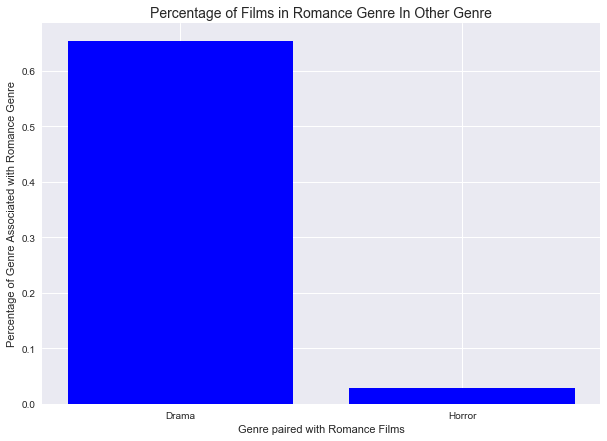

In [29]:
## initialize X and Y for plotting 
Y = np.array([drama_romance_perc, horror_romance_perc])
LABELS = np.array(["Drama", "Horror"])
X = [1,2]

plt.figure(figsize=(10, 7))
plt.bar(X, Y,  color="blue")
plt.xticks(X, LABELS)
plt.title("Percentage of Films in Romance Genre In Other Genre", fontsize=14)
plt.xlabel("Genre paired with Romance Films")
plt.ylabel("Percentage of Genre Associated with Romance Genre")

### Explanation of Romance and Other Dramas
The takeaway from the above bar graph is that more romance fils are paired with drama than they are by horror. (BY A LOT.) However, let's explain how we received our results. 

We decided to compare the percentage of romance films that were ALSO associated with other genres. To do this, we selected a random subset of our romance films. We used roughly 380 romance films randomly selected from all films with the genre "romance" tag. Of these 380 films, we then looked at the percentage of these films that also shared the genre tag "horror" or "drama" or both. We divided by the total number of films with the horror/drama tag by all romance films used. This gave us are above percentages. 

### Sketches and Future EDA

Here are sketches of other visualizations we plan to complete.

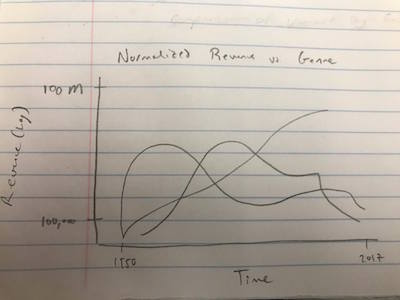

In [30]:
Image(filename='../eda_sketches/sketch1.jpg') 

This is a normalized revenue graph, displaying the amount of revenue that genres have made over time.

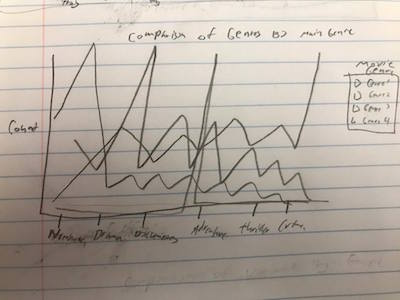

In [31]:
Image(filename='../eda_sketches/sketch2.jpg') 

This graph is a color-coded line chart. This shows the distribution of secondary genres by main genres in comparison to each other genre.

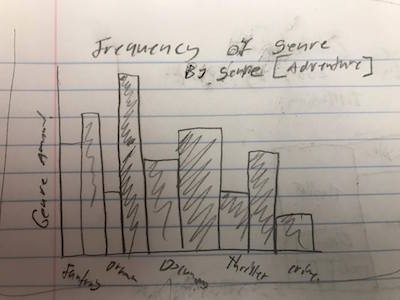

In [32]:
Image(filename='../eda_sketches/sketch3.jpg') 

This graph is a bar graph that shows the frequency of other genres within a defined genre. For example, here we have the genre of “Adventure” along with all the subcategories that also exist within it.

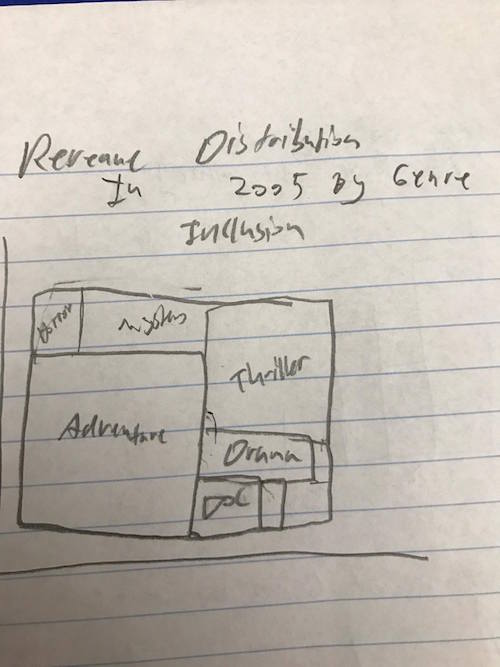

In [33]:
Image(filename='../eda_sketches/sketch4.jpg') 

Finally, we have a treemap to show the relative amount of revenue by genre for a subset year.

# #7: A list of questions you could answer with this and related data. Get creative here!

* Which movies are the most fluid across genres?
* Which genres are most constrictive (i.e. does having genre X mean you're less likely to be paired with another genre?)
* What pairing of movies genres are most likely to go together?
* Do certain genre pairings result in higher amounts of revenue (e.g. "action romance" doing better than "action")?
* Are there statistically significant differences in movie length by genre? For example, are comedies consistently lower?
* Are there statistically significant differences in movie rating by movie length? Do people tend to like shorter movies more or longer movies more? How does this difference interact with genre?
* What is the highest revenue per minute by genre (we could answer this by dividing average revenue by average movie length)?
* Are adult films frequently labelled other genres? For example, are there such things as "adult fantasy" films and "adult comedy" films?
* How do these english genre distributions compare versus a similar analysis done on a different language’s database? Are french movies, for instance, more likely to have different genre pairings than english movies?
* How does genre density differ as a function of time? Are some genres more popular now vs. long ago? What about pairing of genres?
* Does having an unoriginal movie title (e.g. "300") help revenue or hurt?
* How has (normalized) revenue changed over time as a function of genre? What about popularity?

# Milestone 2: Assembling training data, due Wednesday, April 12, 2017

We are aware that you have little time this week, due to the midterm. So this milestone is a bit easier to achieve than the others. The goal for this week is to prepare the data for the modeling phase of the project. You should end up with a typical data setup of training data X and data labels Y.

The exact form of X and Y depends on the ideas you had previously. In general though Y should involve the genre of a movie, and X the features you want to include to predict the genre. Remember from the lecture that more features does not necessarily equal better prediction performance. Use your application knowledge and the insight you gathered from your genre pair analysis and additional EDA to design Y. Do you want to include all genres? Are there genres that you assume to be easier to separate than others? Are there genres that could be grouped together? There is no one right answer here. We are looking for your insight, so be sure to describe your decision process in your notebook. 

In preparation for the deep learning part we strongly encourage you to have two sets of training data X, one with the metadata and one with the movie posters. Make sure to have a common key, like the movie ID, to be able to link the two sets together. Also be mindful of the data rate when you obtain the posters. Time your requests and choose which poster resolution you need. In most cases w500 should be sufficient, and probably a lower resolution will be fine.

The notebook to submit this week should at least include:

- **Discussion about the imbalanced nature of the data and how you want to address it**
There is natural imabalance in our data because not every genre is represented in the same frequency on the TMDB 'discover' page. This is potentially because some genres (like action/adventure) are more popular with viewers and thus with producers than other genres (like documentaries). We discuss our choices in building our dataset with regard to this popularity imbalance in the following section. 

    We decided to perform a stratified sampling of our data because otherwise our poster dataframe would be too massive (700Gb). We want to downsize (scale) our dataset without changing the proportions of each of the genres in the original (large) dataset. To do this, we found the relative frequency of each movie genre in the entire dataset and then sampled according to these proportions. We ended up with a dataframe with 100 rows that has the same genre proportions as the big dataset.

    We chose 100 because some genres appear only 1% or 2% in the dataset, so using any size lower than 50 would mean that we wouldn't sample any of these genres, thus teaching our model not to predict these genres in the first place.

    Because of the imbalances we have in our data, we may want to explore combining some of the less-common genres such as Documentary and History into combined genres renamed as "Informative" for example (or Thriller and Horror into "Scary"). This will decrease the number of labels that we are predicting over and it makes our data less imbalanced by making sparse columns more populated. 
    
- **Description of your data **
As shown in our summary table of the first 28 pages, adventure, action, and drama are the most represented within the database whereas documentary, western, and TV Movie are the least represented among sample, again, as shown in our summary table later in the notebook. Because the imbalance, we will need to take special precautions when sampling.

    It is important to note that the 28 pages of TMDB movies are the most popular movies on TMDB as determined by the website's 'popularity' metric. While we found that the 'discover' function was the most convenient way we could quickly scrape together the data of many different movies, it seems worthwhile to note that this may exacerbate imbalances in our data. For example, if documentaries are by some measure less entertaining and thus less popular (as determined by TMDB) than "mainstream" movies like action-dramas, then our data aggregation technique would naturally have a lower representation of documentaries. In this case, genre proportion would be driven by the overall popularity of the genre instead of the overal number of documentaries created relative to other genres. 
    
    We don't believe that this is necessarily a bad thing for our data. It would simply mean that our universe of movies would be those that are most watched as opposed to those that are most made. This scheme has the added benefit that those movies that are more watched likely have fewer missing data. 
    
    Furthermore, there is a technical constraint on shifting our universe to those that are most made. Because we believe (uncontroversially) that most movies are flops that few people have ever watched, we would need to scrape the movie data of a significantly higher number of movies in order to achieve a workable dataset. Furthremore, the 'discover' function in the API may not be enough, and we might need to slowly crawl through the alphabet to pick up those movies which don't appear on any of the pre-made pages by TMDB. While this may be an interesting problem to tackle, we think that the potential marginal benefit to this approach is not enough to greatly change the scope of the project. Thus, we will choose to continue to use a popularity-based approach. 

- **How do you sample your data, how many samples, and why?**
Here, for our test sample, we selected the first 28 pages of data. Beyond this amount, certain catagories ran out of data to then fairly sample from all genres and get a unified sample set. We took 100 samples from our original data of 500+ movies. 

    We then calculated and stored the genre proportions in our complete 28-page data. We then performed simple random sampling where we sampled each of the genres individually according to the previously calculated proportions. For instance, if 15% of our movies were "Action" in our 28-page dataset, we would sample 15 movies from our action movies in the original dataset. This would preserve the genre proportions in our new dataset while scaling down the size of our training data, thereby making it more tractable to train our models for our images. 

- **What does your choice of Y look like?**
We decided for our Y that we would keep all of the genres that were labeled in TMDB. We decided to keep 18 of our 19 original genres (1 genre had extremely low occurence - just 1 data point). This means that when we make predictions, we will need to predict multiple lables (likely multiple bernoulli decisions, i.e. we will give a probability for all of the different genres. Because movie can have more than one genres, these selections are not mutually exclusive.) We will then predict the movie genres that are over 50% or we will take the top 2,3,4 or 5 genres as predictions. We might also take in our model the number of genres that the movie truly has. This will then make us only predict that number of genres (so we will take the four genres that are most likely). 


 - **Which features do you choose for X and why?**
For our X, we wanted to take in features that we believed would be predictive of our response variable. 

    For our metadata, we chose to use variables such as the movie description, popularity, title, and vote average. We believe that each of These would have some predictive power in our model. In addition, we expanded our feature set beyond the suggested features by finding the director of each movie and the leading 3 actors. We did this by crawling  through the credits of each movie and then crawling through the list of cast members and crew members. We think that the leading actors and directors should give us improved predictive ability because most actors work on similar-type movies that would have similar genres, and many directors have specialties in movie production that would lead them to make more or less of certain genres (e.g. Michael Bay loves explosions - action). 

    Similarly, we took data from the poster path and the backdrop. This allows us to access the individual posters themselves and then use them in our machine learning analysis. We can also augment our poster image data with our metadata features, but this is something that we can continue to explore going forward. 

- **Next Steps** In the next milestone, we hope to incorporate priors into our models which indicate a priori prevalence of genre pairings. This is particularly important because when we are performing stratified sampling, we are using the genre proportions that are from only 28 pages of data. Thus, for more uncommon genres, there is high variance in simply applying a frequentist estimate of genre likelihood (e.g. the true proportion of documentaries could be 5% of movies, but in a sample of 500 movies it's very plausible that we could have only seen 10 documentaries (2% of sample). 

In [34]:
genre_ids.keys()[15:]

[u'Documentary', u'War', u'TV Movie', u'History']

In [35]:
# scrape the data
discover = tmdb.Discover()
base_url  = "https://image.tmdb.org/t/p/w500"

d_metadata = []
d_poster = [] 

# set to 20 to get more data
NUM_PAGES = 4

count = 0

for genre in genre_ids.keys():
    
    # only pull 3 genres per
    #if count >= 2:
        #break
        
    print genre, genre_ids[genre]
    for p in range(1, NUM_PAGES):
        # find all movies on a given page
        discover.movie(with_genres = genre_ids[genre], page = p)

        ## note that discover results is a list of dicts
        ## we are iterating through a page and getting each individual movie's information 
        for movie in discover.results:
            time.sleep(2)
            
            # get list of cast and crew (contains directors)
            credits = tmdb.Movies(movie['id']).credits()

            # cycle through cast to extract 3 lead actors
            cast = credits['cast']
            actor_lst = []
            count = 0
            for actor in cast:
                actor_lst.append(actor['name'])
                count = count + 1
                if count >= 3:
                    break

            # cycle through crew to extract director
            crew = credits['crew']
            for person in crew:
                if person['job'] == 'Director':
                    director = person['name']
                    break

            d_metadata.append({"movie_id": movie["id"],
                               "title": movie["title"], 
                               "overview": movie["overview"],
                               "poster_path": movie["poster_path"],
                               "release_date": movie["release_date"],
                               "vote_count": movie["vote_count"],
                               "popularity": movie["popularity"],
                               "video": movie["video"],
                               "adult": movie["adult"],
                               "vote_average": movie["vote_average"],
                               "genre_ids": movie["genre_ids"], 
                               "lead actors": actor_lst, 
                               "director": director
                              })

            d_poster.append({"movie_id": movie["id"],
                             "title": movie["title"], 
                             "genre_ids": movie["genre_ids"], 
                             "poster_url": base_url + str(movie["poster_path"])
                            })

        # uncomment when extracting large amounts of data 
        time.sleep(15)
    count = count + 1

# metaframe df
df_metadata = pd.DataFrame(d_metadata)

# poster df for neural nets
df_poster = pd.DataFrame(d_poster)

Mystery 9648
Romance 10749
Family 10751
Science Fiction 878
Horror 27
Thriller 53
Crime 80
Drama 18
Fantasy 14
Western 37
Animation 16
Music 10402
Adventure 12
Action 28
Comedy 35
Documentary 99
War 10752
TV Movie 10770
History 36


In [36]:
# metaframe df
df_metadata = pd.DataFrame(d_metadata)

# poster df for neural nets
df_poster = pd.DataFrame(d_poster)

In [37]:
df_metadata_15 = df_metadata.copy()
df_poster_15 = df_metadata.copy()

In [38]:
print df_metadata.shape
df_metadata.head(1)

(1140, 13)


,adult,director,genre_ids,lead actors,movie_id,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,Denis Villeneuve,"[53, 18, 878, 9648]","[Amy Adams, Jeremy Renner, Forest Whitaker]",329865,Taking place after alien crafts land around th...,26.994312,/hLudzvGfpi6JlwUnsNhXwKKg4j.jpg,2016-11-10,Arrival,False,6.9,3736


In [ ]:
#df_metadata.poster_path = map(lambda path: path.encode("utf-8"), df_metadata.poster_path)
df_metadata.title = map(lambda title: title.encode("utf-8"), df_metadata.title)
df_metadata.overview = map(lambda overview: overview.encode("utf-8"), df_metadata.overview)
#df_metadata.director = map(lambda director: director.encode("utf-8"), df_metadata.director)

In [44]:
df_metadata.columns

Index([u'adult', u'director', u'genre_ids', u'lead actors', u'movie_id',
       u'overview', u'popularity', u'poster_path', u'release_date', u'title',
       u'video', u'vote_average', u'vote_count'],
      dtype='object')

In [ ]:
# fix a weird ascii encoding issue
#for col in ["director", "overview"]:
for col in ["director", "overview", "title"]:
    df_metadata[col] = map(lambda x: str(x), df_metadata[col])

In [48]:
df_metadata_dummies = df_metadata.genre_ids.astype(str).str.strip('[]').str.get_dummies(', ')
df_metadata_dummies.columns = df_metadata_dummies.columns.str.strip("'")

df_meta_movie_instance = df_metadata_dummies.apply(pd.value_counts).fillna(0)
df_meta_movie_instance = df_meta_movie_instance.drop(df_meta_movie_instance.index[0])

colnames = list(df_metadata_dummies.columns) + list(df_metadata.columns)
combined_df = pd.DataFrame(pd.concat([df_metadata_dummies, df_metadata], axis = 1),
                      columns = colnames)

In [49]:
combined_df.head(1)

,10402,10749,10751,10752,10770,12,14,16,18,27,...,lead actors,movie_id,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,0,0,0,0,0,0,0,0,1,0,...,"[Amy Adams, Jeremy Renner, Forest Whitaker]",329865,Taking place after alien crafts land around th...,26.994312,/hLudzvGfpi6JlwUnsNhXwKKg4j.jpg,2016-11-10,Arrival,False,6.9,3736


In [50]:
combined_df.shape

(1140, 32)

In [51]:
combined_df.columns

Index([u'10402', u'10749', u'10751', u'10752', u'10770', u'12', u'14', u'16',
       u'18', u'27', u'28', u'35', u'36', u'37', u'53', u'80', u'878', u'9648',
       u'99', u'adult', u'director', u'genre_ids', u'lead actors', u'movie_id',
       u'overview', u'popularity', u'poster_path', u'release_date', u'title',
       u'video', u'vote_average', u'vote_count'],
      dtype='object')

In [52]:
combined_df.drop("genre_ids", axis = 1, inplace = True)

In [ ]:
combined_df.to_csv("train.csv")

In [ ]:
combined_df.to_csv("../data/train.csv")

In [55]:
# inspect data
df_poster.head(1)

,genre_ids,movie_id,poster_url,title
0,"[53, 18, 878, 9648]",329865,https://image.tmdb.org/t/p/w500/hLudzvGfpi6Jlw...,Arrival


In [56]:
# dummifies list of genres, placing genres in new columns
df_dummies = df_poster.genre_ids.astype(str).str.strip('[]').str.get_dummies(', ')
df_dummies.columns = df_dummies.columns.str.strip("'")

In [57]:
# get number of occurences in dataset and remove nulls
df_movie_instance = df_dummies.apply(pd.value_counts).fillna(0)
df_movie_instance = df_movie_instance.drop(df_movie_instance.index[0])

In [58]:
df_movie_instance

,10402,10749,10751,10752,10770,12,14,16,18,27,28,35,36,37,53,80,878,9648,99
1,82,156,227,100,63,403,215,176,451,92,402,260,99,71,269,145,211,130,63


In [59]:
df_dummies.head(2)

,10402,10749,10751,10752,10770,12,14,16,18,27,28,35,36,37,53,80,878,9648,99
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0


In [60]:
# create the dataframe that will be sampled
colnames = list(df_dummies.columns) + list(df_poster.columns)

to_sample = pd.DataFrame(pd.concat([df_dummies, df_poster], axis = 1),
                      columns = colnames)
to_sample.head(2)

,10402,10749,10751,10752,10770,12,14,16,18,27,...,37,53,80,878,9648,99,genre_ids,movie_id,poster_url,title
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,0,"[53, 18, 878, 9648]",329865,https://image.tmdb.org/t/p/w500/hLudzvGfpi6Jlw...,Arrival
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,"[28, 9648, 878, 53]",198663,https://image.tmdb.org/t/p/w500/coss7RgL0NH6g4...,The Maze Runner


In [61]:
# relative freq for each movie genre
total_cnt = df_movie_instance.sum(axis = 1).iloc[0]
movie_percentages = df_movie_instance.divide(total_cnt).round(2)

In [62]:
# perform stratified sampling
# rename columns
SAMPLE_SIZE = 100
sampled_df = pd.DataFrame({})

available_genres = map(int, df_dummies.columns)

while available_genres:
    key = available_genres.pop(0)
    n_rows = SAMPLE_SIZE * movie_percentages[str(key)].iloc[0]
    relevant_rows = to_sample[to_sample[str(key)] == 1]
    sampled_rows = relevant_rows.sample(n = int(n_rows))
    
    # redo sampling
    if len(sampled_df) > 0 and len(pd.merge(sampled_df, sampled_rows, on="movie_id")) > 0:
        available_genres.append(key)
        continue
    
    sampled_df = sampled_df.append(sampled_rows)

In [63]:
# look at sampled df
sampled_df = sampled_df.reset_index()
sampled_df.head(2)

,index,10402,10749,10751,10752,10770,12,14,16,18,...,37,53,80,878,9648,99,genre_ids,movie_id,poster_url,title
0,620,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,"[10749, 10751, 16, 14, 10402]",10020,https://image.tmdb.org/t/p/w500/b9QJr2oblOu1gr...,Beauty and the Beast
1,685,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,"[18, 10751, 10402, 10749]",1788,https://image.tmdb.org/t/p/w500/79iEen28ai1rsX...,Footloose


In [64]:
# renaming ids to genre names
column_names = {'12': 'Adventure',
 '14': 'Fantasy',
 '16': 'Animation',
 '18': 'Drama',
 '27': 'Horror',
 '28': 'Action',
 '35': 'Comedy',
 '36': 'History',
 '37': 'Western',
 '53': 'Thriller',
 '80': 'Crime',
 '99': 'Documentary',
 '878': 'Science Fiction',
 '9648': 'Mystery',
 '10402': 'Music',
 '10749': 'Romance',
 '10751': 'Family',
 '10752': 'War',
 '10770': 'TV Movie'}

# format
movie_percentages = movie_percentages.rename(columns=column_names).T.rename(columns={1: 'Percentage'})

In [65]:
movie_percentages.describe()

,Percentage
count,19.000000
mean,0.052632
std,0.031770
min,0.020000
25%,0.030000
50%,0.040000
75%,0.065000
max,0.120000


In [66]:
movie_percentages['Percentage'].sort_values()

Music              0.02
Western            0.02
TV Movie           0.02
Documentary        0.02
History            0.03
War                0.03
Horror             0.03
Mystery            0.04
Romance            0.04
Crime              0.04
Animation          0.05
Family             0.06
Fantasy            0.06
Science Fiction    0.06
Comedy             0.07
Thriller           0.07
Adventure          0.11
Action             0.11
Drama              0.12
Name: Percentage, dtype: float64

Here, we see within our sample we see that the most represented movie is action, adventure, and drama. Looking at our data, we that out least represented movies are Documentary and TV Movie.